# Bayesian Model for COVID-19 infection rate

### by Piotr Morawiecki, Dan Burrows, Tina Zhou, Laura Oporto

The code allows us to estimate posteriors distributions of chosen set of model parameters using INLA (INtegrated Laplace Approximation) package based on data for the United States. This package computes posterior distribution by approximated numerical integration instead of using MCMC to generate sample from the posterior distribution, which reduces computation time.

There are five basic models to choose from, but it is easy to implement other models as well. The code allows to plot the 95% confidence intervals for values of each parameter and the resultant effect of each covartiate on the infection rate.

To use the code we need to set working directory to "USA_Bayesian_Framework" and source functions from INLA_Bayesian_Framework.R file.

In [1]:
setwd("USA_Bayesian_Framework")
source("INLA_Bayesian_Framework.R")

Loading required package: INLA
Loading required package: Matrix
Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.2"Loading required package: parallel
This is INLA_19.09.03 built 2019-09-03 09:03:02 UTC.
See www.r-inla.org/contact-us for how to get help.
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

The default models can be imported using load_default_model function with argument model being integer number from 1 to 5.

There are five models that were used to obtained data from the code documentation on GitHub. Models 1-4 describe the impact of Air Quality Index (averaged over 2 weeks, 2 months, 1 year and 4 years, respectively). Model 5 describes the impact of each pollutant separately.


In [2]:
settings <- load_default_model(model=3)

To run Bayesian inference for given model we use run_Bayesian_model function. The input arguments are provided by the load_default_model function.

In [3]:
results <- run_Bayesian_model(settings$formula, settings$use_weekly, settings$use_deaths,
                              settings$use_Poisson, settings$output_folder)

[1] "The INLA data set consist of 5920 records."
[1] "The results are exported to INLA_results//Model_3_deaths_poisson directory."


Alternatively we can create our own model by providing the following arguments:

#### formula

Formula should include the model for the logarithm of infection rate. It is modelled as linear combination of county's population and environmental descriptors. f(id) represents spatial random effects, f(day) represents temporal random effects and f(rowId) represents the remaining random effects (model="idd" are independent and identically distributed random variables, and model="ar1" is an autoregressive model of order 1).

#### use_weekly

Allows to use weekly averaged data to reduce the size of input dataset (and time needed to perform Bayesian inference). Set use_weekly to TRUE if INLA_computation takes too much time. Otherwise it is recommended to use daily data by setting use_weekly to FALSE.

#### use_deaths

There are two possible COVID-19 descriptors - cases and deaths. To use deaths data set use_deaths to TRUE. To use cases data set deaths to FALSE. There are more days with confirmed cases data, but these data are biased as the number of COVID tests may vary. Less data with deaths are available, but it is more reliable.

#### use_Poisson

To use Poisson distrobution set use_Poisson to TRUE. To use negative binomial distrobution set use_Poisson to FALSE.

#### output_folder

Name of the directory, where all output files and figures are saved.

In [4]:
formula       <- new_cases ~ AQI_2019 + popdensity + f(id, model = "iid") +  f(day, model = "ar1") + f(rowId, model = "iid")
use_weekly    <- TRUE
use_deaths    <- TRUE
use_Poisson   <- TRUE
output_folder <- "INLA_results//Model_1_deaths_poisson"

results <- run_Bayesian_model(formula, use_weekly, use_deaths, use_Poisson, output_folder)

[1] "The INLA data set consist of 5920 records."
[1] "The results are exported to INLA_results//Model_1_deaths_poisson directory."


The inference results are save in results\\$INLA_result object. The summary statistics of posterior distribution for each fixed parameter in the model is stored in results\\$INLA_result$summary.fixed. Note that all covariates are normalised before applying Bayesian inference to allow to easily compare the relative effect of each covariate on the infection rate. We can find the mean and variation of each covariate before the normalisation in results\\$data_statistics object.

The full model summary can be accessed using the command summary(results$INLA_result).

In [5]:
results$INLA_result$summary.fixed

,mean,sd,0.025quant,0.5quant,0.975quant,mode,kld
(Intercept),-0.8533147,0.96452974,-2.74703863,-0.85332877,1.03872954,-0.85327489,9.166408e-08
AQI_2019,0.1216565,0.02544684,0.07178500,0.12162484,0.17165787,0.12156364,9.848996e-07
popdensity,0.0101279,0.02381583,-0.03663066,0.01012732,0.05684656,0.01012817,3.929449e-08


This summary can be also represented in a graphical form using plot_fixed_parameters function. The graph allows to easily understand the relative impact of each covriate on the infection rate and verify whether the results are statistically significant with a 95\% confidence interval.

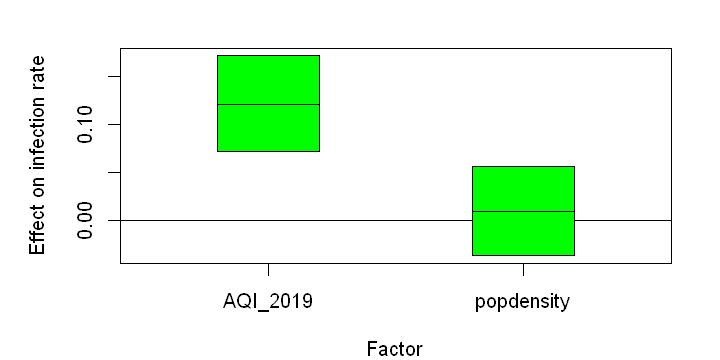

In [6]:
options(repr.plot.width=6, repr.plot.height=3)
plot_fixed_parameters(results$INLA_result, settings$output_folder)

To find the effect of each covariate on the infection rate we can use plot_covariates_effect. It can allow to easily assess how the infection rate may be affected by a change in a given variable (such as air pollution) The 90\% confidence interval is represented by the light grey area and 50\% confidence interval by the dark grey area. The intervals are obtained by sampling model parameters from their posterior distribution n_sims times.

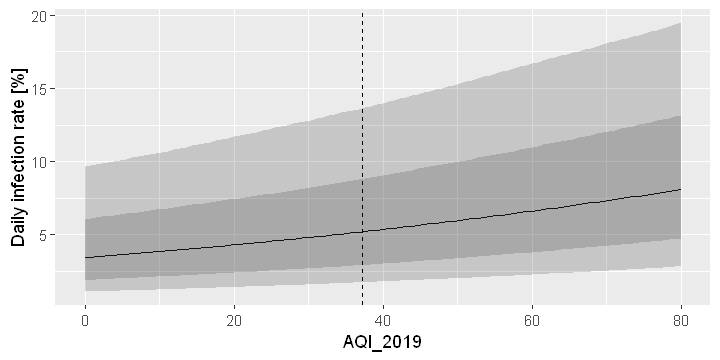

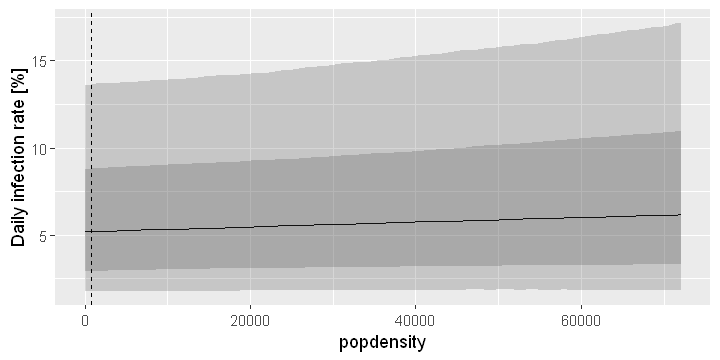

In [7]:
options(repr.plot.width=6, repr.plot.height=3)
plot_covariates_effect(results$INLA_result, results$data_statistics, settings$use_weekly, settings$output_folder, n_sims=10000)

In case of any questions, please contact pwm27@bath.ac.uk